In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

`isr.umich.edu-psid-inequality-1.1.2` Last Update: 2023-06-08T00:22:01

__



## Updating Data

To update the data, use the data extraction tool at the (PSID website. )[https://simba.isr.umich.edu/Cart/co.aspx], adding any new variables to your data cart. The (variable entry text box)[https://simba.isr.umich.edu/DC/l.aspx] is a handy way to copy the existing varibles into a new cart.  When you checkout your data cart, ( click on the cart icon ) fetch your dataset with these options: 

* Codebook Type: XML
* Data output type: dBase Data File, create compressed file

Download the ZIP file ( you might have to recompress it if your browser unpacks it ) and move it into the ``data`` directory. Set the reference to the new ZIP file, then re-build the package.
## Documentation Links

* [PSID Homepage](https://psidonline.isr.umich.edu/default.aspx) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* **[psid_ineq](data/psid_ineq.csv)**. PSID, Inequality extract
* **[_labels](data/_labels.csv)**. Categorical value labels
* **[data_dictionary](data/data_dictionary.csv)**. List of Variables

## References
<ul><li> <strong><a href="https://psidonline.isr.umich.edu/help/xyr/psid.xlsx">variables</a></strong>. Variable descriptions, in a cross-year format.</li><li> <strong>source</string>, <em>data/J321073.zip</em>. Downloaded source file</li><ul>

In [3]:
labels = pkg.resource('_labels').dataframe()

In [4]:
dd = pkg.resource('data_dictionary').dataframe()
dd['name'] = dd['name'].str.lower()
dd.head()

,year,type_id,name,label,qtext,etext,type,category,text,head_wife,var_count,path
0,1968,0,er30000,RELEASE NUMBER,Release Number,For Release 2 we have updated Relation to Hea...,INDIVIDUAL,SURVEY INFORMATION,01>SURVEY INFORMATION:\n02>Interview Informati...,NaN,1,/survey information:/interview information/rel...
1,1968,0,er30001,1968 INTERVIEW NUMBER,1968 Interview Number (1968 ID Number),This variable is the 1968 family ID number. T...,INDIVIDUAL,SURVEY INFORMATION,01>SURVEY INFORMATION:\n02>Interview Informati...,NaN,41,/survey information:/interview information/id ...
2,1968,0,er30002,PERSON NUMBER 68,Person Number,,INDIVIDUAL,SURVEY INFORMATION,01>SURVEY INFORMATION:\n02>Interview Informati...,NaN,1,/survey information:/interview information/per...
3,2001,1,er17001,RELEASE NUMBER,Release Number,"May 2008: Variables ER20395-ER20458, formerly...",FAMILY PUBLIC,SURVEY INFORMATION,01>SURVEY INFORMATION\n02>Interview Informatio...,NaN,16,/survey information/interview information/rele...
4,2001,1,er17012,# IN FU,Number of Persons in FU at the Time of the 200...,This variable represents the actual number of ...,FAMILY PUBLIC,FAMILY COMPOSITION,01>FAMILY COMPOSITION\n02>Current:\n03>number ...,NaN,41,/family composition/current:/number in family ...


In [5]:
df = pkg.resource('psid_ineq').dataframe(convert_categorical=True)
df.head()

,pid,er30001,er30002,er30000,er33601,er33701,er33801,er33901,er34001,er34101,...,er46502,er51863,er57603,er51957,er57713,er64873,er27446,er40618,er46596,er23478
0,4003,4,3,"Release number 3, June 2022",96,1392,289,148,13,218,...,832.0,832.0,NaN,936.0,NaN,NaN,936.0,936.0,936.0,936.0
1,4004,4,4,"Release number 3, June 2022",5987,6278,2356,5399,1827,8397,...,0.0,0.0,0.0,516.0,516.0,NaN,516.0,516.0,516.0,516.0
2,4005,4,5,"Release number 3, June 2022",6872,7782,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,742.0
3,4006,4,6,"Release number 3, June 2022",5599,4812,4097,720,1840,2541,...,0.0,0.0,0.0,476.0,476.0,476.0,476.0,476.0,476.0,476.0
4,4007,4,7,"Release number 3, June 2022",7091,0,6880,0,1840,2541,...,0.0,0.0,0.0,476.0,476.0,476.0,832.0,NaN,476.0,NaN


In [6]:
# The race of each record will be the race of the head of household, which will be collapsed from
# multiple values over multiple years. Apparently they ask for race every year, so it can change from year to
# year. 
#
# L40 is 'race of head'

roh_cols = dd[dd.label.str.contains('L40')].name.str.lower().to_list()

# race_map = { k:'' for k in df[roh_cols].stack().unique() }

race_map = {
 'White': 'white',
 'NA; DK': 'na',
 'Black': 'black',
 'Black, African-American, or Negro': 'black',
 'NA; refused': 'na',
 'American Indian or Alaska Native': 'aian',
 'Other': 'other',
 'Mentions Latino origin or descent': 'hisp',
 'Latino origin or descent': 'hisp',
 'DK; NA': 'na',
 'DK; NA; refused': 'na',
 'Asian, Pacific Islander': 'aapi',
 'Asian': 'asian',
 'American Indian, Aleut, Eskimo': 'aian',
 'Wild code': 'na',
 'Native American': 'aian',
 'Native Hawaiian or Pacific Islander': 'nhopi',
 'Mentions color other than black or white': 'other',
 'Color besides black or white': 'other',
  None: 'na'}

t =df[roh_cols].replace(race_map).fillna('na').mode(axis=1)

rows  = []
for idx, r in t.replace({'na':'zzz'}).iterrows():
    rows.append(r.sort_values())
    
df['race'] = pd.DataFrame(rows)[0]

In [ ]:


r = pkg.resource('psid_ineq')

translate_year(vars_for_year(r, 1999), 2019)
find_year(varis, 'er13011', (2005, 2019) ).T
vars_for_year(r, 1999)

In [7]:
t = df.groupby('er30001').pid.count()
t.index[t.argmax()]
df[df.er30001==1695.0]


,pid,er30001,er30002,er30000,er33601,er33701,er33801,er33901,er34001,er34101,...,er51863,er57603,er51957,er57713,er64873,er27446,er40618,er46596,er23478,race
12471,1695001,1695,1,"Release number 3, June 2022",4162,4627,560,0,0,0,...,NaN,NaN,NaN,NaN,NaN,775.0,NaN,NaN,962.0,zzz
12472,1695002,1695,2,"Release number 3, June 2022",4162,4627,560,1800,2763,491,...,0.0,0.0,775.0,775.0,775.0,775.0,775.0,775.0,962.0,white
12473,1695003,1695,3,"Release number 3, June 2022",3303,2445,816,658,3157,831,...,880.0,880.0,562.0,562.0,562.0,562.0,562.0,562.0,562.0,white
12474,1695004,1695,4,"Release number 3, June 2022",2671,2341,2100,1753,2707,112,...,411.0,411.0,962.0,962.0,962.0,962.0,962.0,962.0,962.0,white
12475,1695005,1695,5,"Release number 3, June 2022",2669,3762,1245,0,0,0,...,NaN,NaN,NaN,NaN,NaN,810.0,NaN,NaN,810.0,zzz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,1695277,1695,277,"Release number 3, June 2022",5565,5482,2463,1459,7603,8352,...,0.0,0.0,405.0,405.0,623.0,651.0,651.0,405.0,651.0,white
12628,1695278,1695,278,"Release number 3, June 2022",5565,5482,2463,1459,7603,8352,...,0.0,0.0,405.0,405.0,623.0,651.0,651.0,405.0,651.0,white
12629,1695279,1695,279,"Release number 3, June 2022",2787,3023,1395,1465,5257,1759,...,472.0,472.0,402.0,402.0,0.0,402.0,402.0,402.0,402.0,white
12630,1695280,1695,280,"Release number 3, June 2022",4803,2470,2011,6554,5499,8286,...,874.0,NaN,999.0,NaN,874.0,999.0,999.0,999.0,999.0,white


<AxesSubplot: >

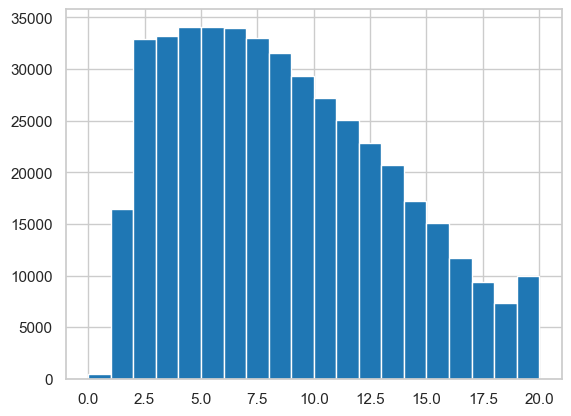

In [8]:
# Unweighted age of vehicles

# COlumns that mention the model year
ml_cols = dd[dd.label.str.contains('MODEL YEAR')].name.str.lower().to_list()

# Add in the pid and remove non-year codes
t =df[['pid']+ml_cols].set_index('pid').replace([0, -1, 9997, 9998, 9999],None)

# Subtract from the year for each colum to get age. 
for c in ml_cols:
    year = dd[dd['name'] == c].iloc[0].year +1 # The min ages were -1
    t[c] = year-t[c]

# Re-add race
t = df[['pid','race']].merge(t.reset_index())

# Stack so we can use group
t = t.set_index(['pid','race']).stack().to_frame('age').reset_index()

t.age.hist(bins=int(t.age.max()))

In [9]:
# Could also use the data dictionary, but using the Metatab metadata will be more
# common acorss packages.

cols = pkg.resource('psid_ineq').columns()


In [10]:
cm = dict( zip( df['er33603'].cat.codes, df['er33603'] ) )
cm

{1: 'Head in 2001; 1999 Head who was mover-out nonresponse by the time of the 2001 interview',
 2: 'Legal Wife in 2001; 1999 Wife who was mover-out nonresponse by the time of the 2001 interview',
 3: '&quot;Wife&quot;--female cohabitor who has lived with Head for 12 months or more; 1999 &quot;Wife&quot; who was mover-out nonresponse by the time of the 2001 interview',
 0: 'Inap.:  from Latino sample (ER30001=7001-9308); from Immigrant 2017 sample (ER30001=4001-4851); main family nonresponse by 2001 or mover-out nonresponse by 1999 (ER33601=0); born or moved in after the 2001 interview (ER33601&gt;0 and ER33602=0)',
 4: 'Son or daughter of Head (includes adopted children but not stepchildren)',
 15: 'Grandson or granddaughter of Head (includes grandchildren of legal Wife (code 20), but those of a cohabitor are coded 97)',
 5: 'Stepson or stepdaughter of Head (children of legal Wife (code 20) who are not children of Head)',
 25: 'First-year cohabitor of Head',
 12: 'Father or mother of H

er19989	number	2001	L40/95 RACE OF HEAD 1
er76897	number	2019	L40 RACE OF REFERENCE PERSON-MENTION 1

er33603	integer	2001	RELATION TO HEAD                      01
er34703	integer	2019	RELATION TO REFERENCE PERSON          19

er33607	integer	2001	MARITAL PAIRS INDICATOR               01
er34707	integer	2019	MARITAL PAIRS INDICATOR               19

er17012	number	2001	# IN FU
er72016	number	2019	# IN FU

!!!er47318	number	2011	SEX OF HEAD
er72018	number	2019	SEX OF REFERENCE PERSON


er20456a3	number	2001	FOOD AWAY FROM HOME EXPENDITURE 2001
er77516	number	2019	FOOD AWAY FROM HOME EXPENDITURE 2019

er28037e3	number	2005	OTHER RECREATION EXPENDITURE 2004
er77585	number	2019	OTHER RECREATION EXPENDITURE 2018

er17044	number	2001	A20 HOUSE VALUE
er72031	number	2019	A20 HOUSE VALUE

er33639	integer	2001	CORE/IMM INDIVIDUAL CROSS-SECTION WT  01	SAMPLE WEIGHT

s505	number	2001	IMP VAL CHECKING/SAVING (W28) 01

s504	number	2001	IMP WTR CHECKING/SAVING (W27) 01
er71433	number	2017	IMP WTR CHECKING/SAVING (W27) 2017

s520	number	2001	IMP VALUE HOME EQUITY 01
er77507	number	2019	IMP VALUE HOME EQUITY 2019

W125 Inheritance


In [11]:
t = df[df.er33603.cat.codes == 1] # Heads in 2001
t[['er18429','er20456a3']]

,er18429,er20456a3
0,Inap.: received no food stamps this year,1560.0
1,Inap.: received no food stamps this year,600.0
4,Inap.: received no food stamps this year,960.0
5,Inap.: received no food stamps this year,1560.0
8,Inap.: received no food stamps this year,1820.0
...,...,...
41415,Inap.: received no food stamps this year,360.0
41418,Inap.: received no food stamps this year,1300.0
41427,Inap.: received no food stamps this year,780.0
41428,Inap.: received no food stamps this year,2400.0


In [12]:
df[df.er34703.cat.codes == 1].shape # Heads in 2019

(9816, 697)